In [ ]:
# 下載 data.txt
!wget "https://raw.githubusercontent.com/TA-aiacademy/course_3.0/ML/02_ML/part6/Chapter7/data.txt"

--2023-08-02 07:33:29--  https://raw.githubusercontent.com/TA-aiacademy/course_3.0/ML/02_ML/part6/Chapter7/data.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23278 (23K) [text/plain]
Saving to: ‘data.txt’

data.txt            100%[===================>]  22.73K  --.-KB/s    in 0.001s  

2023-08-02 07:33:30 (18.6 MB/s) - ‘data.txt’ saved [23278/23278]



In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%pylab inline

# load pima-indians-diabetes data, it's a binary classification task
dataset = loadtxt("data.txt", delimiter=",")

# split data into X (features) and y (label)
X = dataset[:, 0:8]
y = dataset[:, 8]

Populating the interactive namespace from numpy and matplotlib


In [ ]:
print(X.shape)

(768, 8)


In [ ]:
print(y.shape)

(768,)


In [ ]:
# we have two labels, 0 with no diabetes, 1 with disbetes
y[:5]

array([1., 0., 1., 0., 1.])

In [ ]:
# split our data into train & test
# train : test = 0.67 : 0.33
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=7,
                                                    test_size=0.33)

In [ ]:
# eval_metrics can selecy rmse, logloss, error,\
# auc, merror, mlogloss or custom define
eval_set = [(X_test, y_test)]
model = XGBClassifier(early_stopping_rounds=10,
                      eval_metric="auc")
model.fit(X_train,
          y_train,

          eval_set=eval_set,
          verbose=True)

[0]	validation_0-auc:0.80187
[1]	validation_0-auc:0.80871
[2]	validation_0-auc:0.81220
[3]	validation_0-auc:0.81347
[4]	validation_0-auc:0.81176
[5]	validation_0-auc:0.81263
[6]	validation_0-auc:0.81424
[7]	validation_0-auc:0.81424
[8]	validation_0-auc:0.81173
[9]	validation_0-auc:0.81156
[10]	validation_0-auc:0.81203
[11]	validation_0-auc:0.81042
[12]	validation_0-auc:0.80851
[13]	validation_0-auc:0.80535
[14]	validation_0-auc:0.80334
[15]	validation_0-auc:0.80582
[16]	validation_0-auc:0.80495
[17]	validation_0-auc:0.80864
[18]	validation_0-auc:0.80851
[19]	validation_0-auc:0.80784
[20]	validation_0-auc:0.80717
[21]	validation_0-auc:0.80743
[22]	validation_0-auc:0.80321
[23]	validation_0-auc:0.80260
[24]	validation_0-auc:0.80334
[25]	validation_0-auc:0.80093
[26]	validation_0-auc:0.79932


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# model.predict_proba will return the probility
# model.predict will return the predict label (use 0.5 as threshold)
y_pred = model.predict_proba(X_test)
y_pred[:5]

array([[0.93781304, 0.06218694],
       [0.13303745, 0.86696255],
       [0.60464454, 0.39535546],
       [0.90863246, 0.09136753],
       [0.29786855, 0.70213145]], dtype=float32)

In [ ]:
# we use model.predict to get the label
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.41%


In [ ]:
# we can show the feature importances for our features
print(model.feature_importances_)

[0.06669603 0.28271103 0.0798532  0.07951088 0.1053735  0.16238339
 0.10070346 0.12276844]


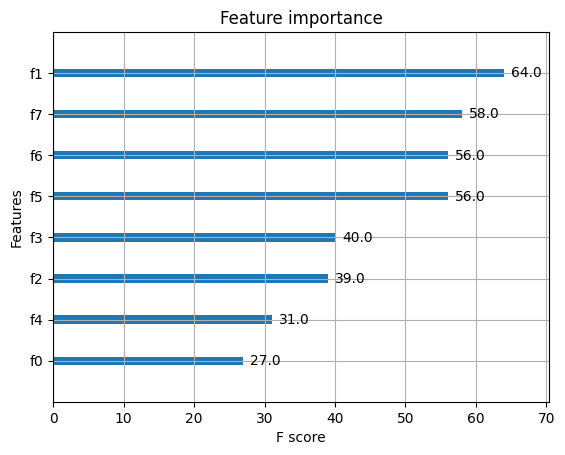

In [ ]:
# import the plot_importance function to visualize the feature importance
from xgboost import plot_importance
plot_importance(model)
plt.show()

In [ ]:
!pip install graphviz

<Axes: >

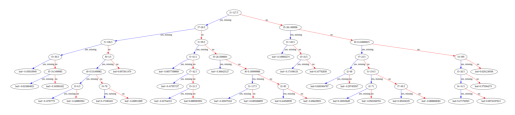

In [ ]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams

plot_tree(model, num_trees=1)
# plt.title("max_depth = 100, with gamma = 10")
# plt.savefig("tree_with_max_depth_gamma", dpi = 700)

## Reference for XGBoost

[Well explained for Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)

[Analytic vidhya parameter tuning](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)
[How parralle xgboost work](http://zhanpengfang.github.io/418home.html)

[How to tune gamma](https://medium.com/data-design/xgboost-hi-im-gamma-what-can-i-do-for-you-and-the-tuning-of-regularization-a42ea17e6ab6)

[slides for xgboost by tqchen](http://homes.cs.washington.edu/~tqchen/pdf/BoostedTree.pdf)

[slides for xgboost by kaggle winner](https://www.slideshare.net/ShangxuanZhang/kaggle-winning-solution-xgboost-algorithm-let-us-learn-from-its-author)

[xgboost 理論與參數介紹](https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC5-2%E8%AC%9B-kaggle%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E7%AB%B6%E8%B3%BD%E7%A5%9E%E5%99%A8xgboost%E4%BB%8B%E7%B4%B9-1c8f55cffcc)
